In [1]:
#import matplotlib
#matplotlib.use('TkAgg')  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib.ticker import FixedLocator
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings('ignore')

C:\Users\joypa\AppData\Local\Temp\ipykernel_18624\2928888324.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('F:/Works/Collaborative Application Development/Day Data/NP21_updated_days.csv', parse_dates=['Date'], index_col=['Date'])  # Replace with the actual file path
print(df)

            Total Registered      Day
Date                                 
2020-09-02                 1    Day 1
2020-09-03                 1    Day 2
2020-09-04                 1    Day 3
2020-09-05                 1    Day 4
2020-09-06                 1    Day 5
...                      ...      ...
2021-11-21                 1  Day 446
2021-11-22                 1  Day 447
2021-11-23                 1  Day 448
2021-11-24                 1  Day 449
2021-11-25                 2  Day 450

[450 rows x 2 columns]


In [3]:
df = df.drop('Day', axis=1)
print(df)

            Total Registered
Date                        
2020-09-02                 1
2020-09-03                 1
2020-09-04                 1
2020-09-05                 1
2020-09-06                 1
...                      ...
2021-11-21                 1
2021-11-22                 1
2021-11-23                 1
2021-11-24                 1
2021-11-25                 2

[450 rows x 1 columns]


In [4]:
# Extract 'Total Registered' column
total_registered = df['Total Registered']
total_registered = total_registered[-70:]

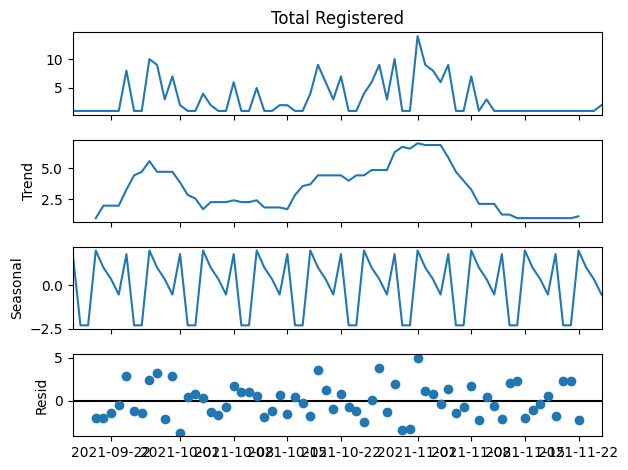

In [5]:
#Stationarity Check (for 'additive')

decomposition = sm.tsa.seasonal_decompose(total_registered, model='additive')
fig1 = decomposition.plot()
plt.show()

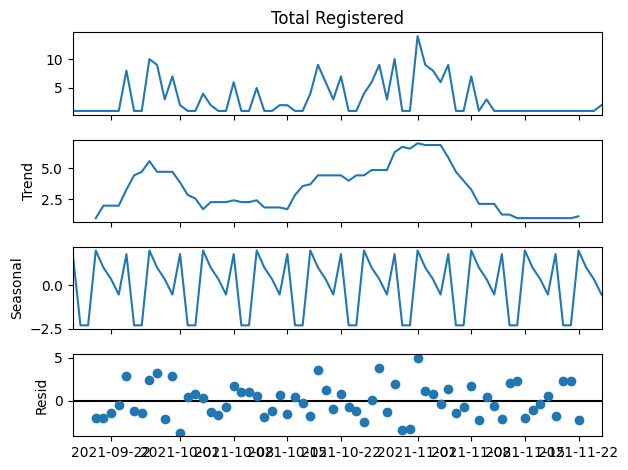

In [6]:
#Stationarity Check (for 'multiplicative')

decomposition1 = sm.tsa.seasonal_decompose(total_registered, model='multiplicative')
fig2 = decomposition.plot()
plt.show()

In [7]:
#pvalue> 0.05 -----> not stationary
#Dickey-Fuller Test

adftest = adfuller(total_registered)
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.22099443570399058


In [8]:
len(total_registered)

70

In [9]:
train = total_registered[:56]
test = total_registered[56:]

In [296]:
model = ARIMA(train, order=(5, 1, 0)).fit()

In [297]:
len(train), len(total_registered-1)

(38, 48)

In [298]:
pred = model.predict(len(train), len(total_registered)-1)
print(pred)

2021-11-16    1.175213
2021-11-17    1.060572
2021-11-18    1.043716
2021-11-19    1.080554
2021-11-20    1.054739
2021-11-21    1.061851
2021-11-22    1.076738
2021-11-23    1.062863
2021-11-24    1.064377
2021-11-25    1.068670
Freq: D, Name: predicted_mean, dtype: float64


In [299]:
error = np.sqrt(mean_squared_error(test, pred))
print(error)

0.30511501587214


In [300]:
test.mean(), np.sqrt(test.var())

(1.1, 0.31622776601683794)

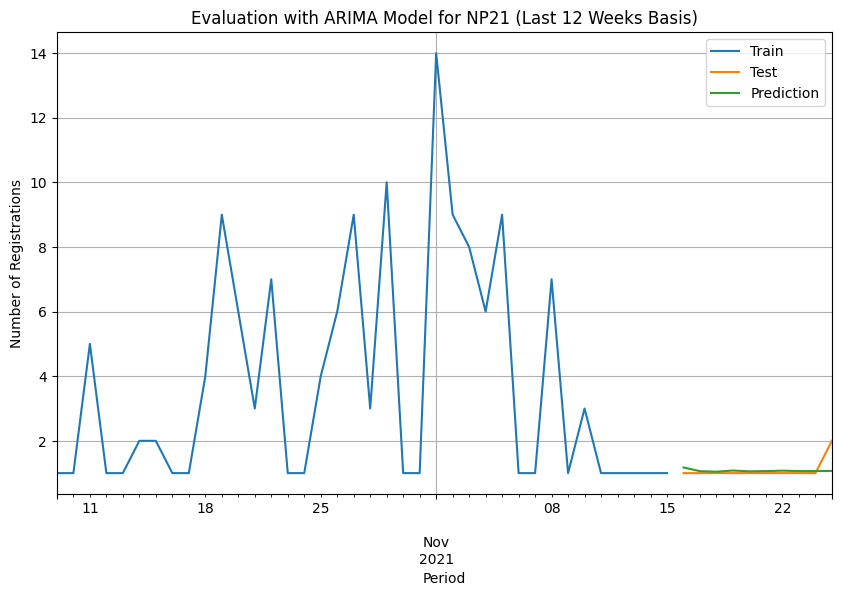

In [301]:
train.plot(legend = True, label = 'Train', figsize = (10, 6))
test.plot(legend = True, label = 'Test')
pred.plot(legend = True, label = 'Prediction')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title('Evaluation with ARIMA Model for NP21 (Last 12 Weeks Basis)')
plt.grid(True)

# Save the figure
plt.savefig('F:/Works/Collaborative Application Development/Python/Images/Arima/Last_12_weeks/Training/NP21_Arima_Last_12_weeks.png')

In [302]:
#forecasting
final_model = ARIMA(total_registered, order=(5, 1, 0)).fit()

In [303]:
prediction = final_model.predict(len(total_registered), len(total_registered) + 42)
print(prediction)

2021-11-26    1.342103
2021-11-27    1.244863
2021-11-28    1.458793
2021-11-29    1.308435
2021-11-30    1.350341
2021-12-01    1.437306
2021-12-02    1.355382
2021-12-03    1.364625
2021-12-04    1.390054
2021-12-05    1.364279
2021-12-06    1.373885
2021-12-07    1.381708
2021-12-08    1.370888
2021-12-09    1.374629
2021-12-10    1.376804
2021-12-11    1.373182
2021-12-12    1.375047
2021-12-13    1.375555
2021-12-14    1.374201
2021-12-15    1.374953
2021-12-16    1.375040
2021-12-17    1.374589
2021-12-18    1.374905
2021-12-19    1.374895
2021-12-20    1.374740
2021-12-21    1.374863
2021-12-22    1.374846
2021-12-23    1.374797
2021-12-24    1.374844
2021-12-25    1.374833
2021-12-26    1.374817
2021-12-27    1.374835
2021-12-28    1.374829
2021-12-29    1.374825
2021-12-30    1.374831
2021-12-31    1.374828
2022-01-01    1.374827
2022-01-02    1.374830
2022-01-03    1.374828
2022-01-04    1.374828
2022-01-05    1.374829
2022-01-06    1.374828
2022-01-07    1.374828
Freq: D, Na

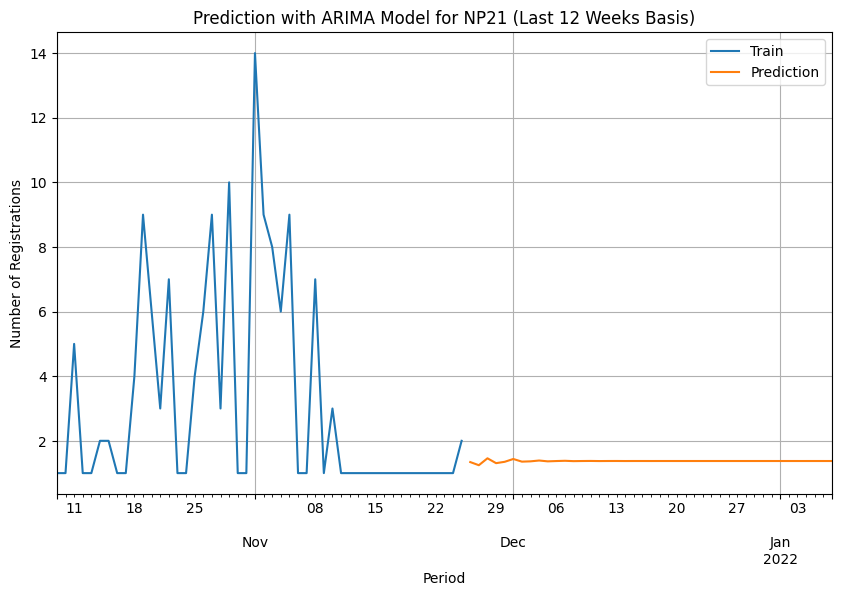

In [304]:
total_registered.plot(legend = True, label = 'Train', figsize = (10, 6))
prediction.plot(legend = True, label = 'Prediction')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title('Prediction with ARIMA Model for NP21 (Last 12 Weeks Basis)')
plt.grid(True)

# Save the figure
plt.savefig('F:/Works/Collaborative Application Development/Python/Images/Arima/Last_12_weeks/Prediction/NP21_Arima_Last_12_weeks.png')

In [ ]:
#...............................................................................................................................#

In [10]:
#finding p,q,d values

p = range(0,8)
q = range(0,8)
d = range(0,2)
pdq_combination = list(itertools.product(p,d,q))
len(pdq_combination)

128

In [11]:
rmse = []
order1 = []
for pdq in pdq_combination:
    try:
        model1 = ARIMA(train, order = pdq).fit()
        pred = model1.predict(len(train), len(total_registered)-1)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)
    except Exception as e:
        print(f'Error fitting model for parameter {pdq}: {str(e)}')
        continue

In [12]:
result = pd.DataFrame(index = order1, data = rmse, columns = ['RMSE'])
#print(result)
print(result.sort_values(by='RMSE'))

               RMSE
(0, 1, 0)  0.267261
(1, 1, 0)  0.586095
(2, 1, 0)  0.594075
(3, 1, 0)  0.772643
(4, 1, 0)  0.835968
...             ...
(6, 1, 7)  3.145212
(6, 1, 6)  3.236204
(6, 1, 2)  3.293199
(3, 1, 6)  3.364762
(6, 1, 4)  3.401408

[128 rows x 1 columns]
